In [2]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

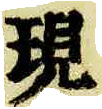

In [2]:
image_path = '/home/love_you/Documents/works/mocban/dataset_25900/cut_25900/25900_4/259002/25900201021104.png'
pil_image = Image.open(image_path)
pil_image

In [3]:
np_image = np.asarray(pil_image)
print(np.amax(np_image))
print(np.amin(np_image))
print(np_image.shape)

#%

255
0
(109, 102, 3)


In [7]:
cv_image = cv2.imread(image_path, 1)
cv_image = cv_image[:, :, :1].copy()
_, binary_image =  cv2.threshold(cv_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [8]:
cv_image.shape

(109, 102, 1)

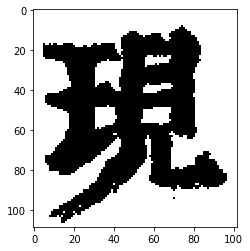

In [5]:
plt.imshow(binary_image, cmap='gray')

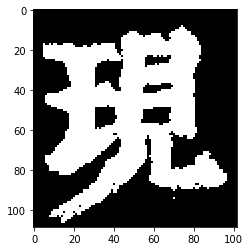

In [18]:
constrast_binary_image = 255 - binary_image
plt.imshow(constrast_binary_image, cmap='gray')

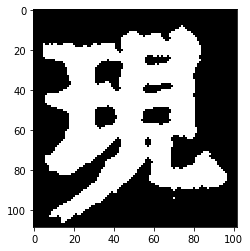

In [31]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
closing = cv2.morphologyEx(constrast_binary_image, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

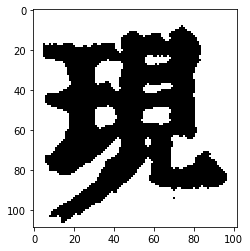

In [32]:
good_binary_image = 255 - closing
plt.imshow(good_binary_image, cmap='gray')

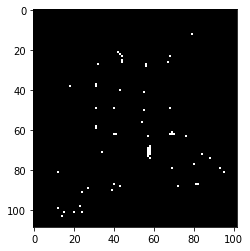

In [33]:
diff_map = (binary_image - good_binary_image)/ 255
plt.imshow(diff_map, cmap='gray', vmax=1, vmin=0)


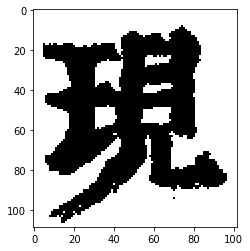

In [34]:
plt.imshow(binary_image,cmap='gray')


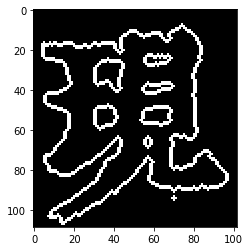

In [35]:
gradient_image = cv2.morphologyEx(good_binary_image, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient_image, cmap='gray')

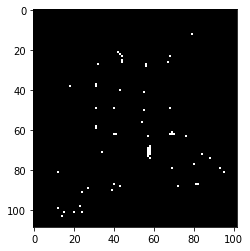

In [36]:
backhat = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, kernel)
plt.imshow(backhat, cmap='gray')